# Machine Learning Engineer Nanodegree
***
## Capstone Project
Monish Ananthu<br>
October 3rd, 2018<br>
***
## Energy Price Prediction
***

## II. Analysis

In [1]:
# Import necessary libraries
import source_data_helper as sc
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing

%matplotlib inline

#### Read CSV Data

We start by reading data which have a frequency of 15 mins:

1. Actual generation
2. Actual consumption
3. Balancing energy

In [2]:
cwd = os.getcwd()
# source_path = os.path.join(cwd, 'datasets', '2015')
source_path = os.path.join(cwd, 'datasets', '2015-2017')

# Read all csv data with a time series frequency of 15 mins. data_freq_15min is a list of dataframes
#data_freq_15min = sc.read_multiple_csv(source_path, ['DE_Actual generation.csv', 'DE_Actual consumption.csv', 'DE_Balancing energy.csv'])
data_freq_15min = sc.read_multiple_csv(source_path, ['DE_Actual generation_2015-2017.csv', 'DE_Actual consumption_2015-2017.csv','DE_Balancing energy_2015-2017.csv'])

dataset has 70271 samples with 14 features each.
dataset has 70271 samples with 3 features each.
dataset has 70271 samples with 4 features each.


**Actual generation** (Frequency = 15 mins)

In [3]:
data_freq_15min[0].head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,12:15 AM,1007.00,287.75,129.25,2023.00,0.0,14.5,2646.25,3963.25,721.25,261.75,149.75,1498.00
2,2015-01-01,12:30 AM,1006.50,292.75,128.50,2040.25,0.0,14.5,2660.75,3924.75,695.75,260.50,173.25,1503.25
3,2015-01-01,12:45 AM,1005.25,289.50,128.75,2036.50,0.0,14.5,2718.00,3871.75,664.75,241.50,95.00,1518.75
4,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75


The amount of energy in MWh(Megawatt hour) from different energy sources for each time period is listed above

In [4]:
# Fix column names with Whitespaces and Uppercases
data_freq_15min[0].columns = data_freq_15min[0].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data_freq_15min[0].head()

,date,time_of_day,biomass[mwh],hydropower[mwh],wind_offshore[mwh],wind_onshore[mwh],photovoltaics[mwh],other_renewable[mwh],nuclear[mwh],fossil_brown_coal[mwh],fossil_hard_coal[mwh],fossil_gas[mwh],hydro_pumped_storage[mwh],other_conventional[mwh]
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,12:15 AM,1007.00,287.75,129.25,2023.00,0.0,14.5,2646.25,3963.25,721.25,261.75,149.75,1498.00
2,2015-01-01,12:30 AM,1006.50,292.75,128.50,2040.25,0.0,14.5,2660.75,3924.75,695.75,260.50,173.25,1503.25
3,2015-01-01,12:45 AM,1005.25,289.50,128.75,2036.50,0.0,14.5,2718.00,3871.75,664.75,241.50,95.00,1518.75
4,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75


 **Actual consumption** (Frequency = 15 mins)

In [5]:
data_freq_15min[1].head()

,Date,Time of day,Total[MWh]
0,2015-01-01,12:00 AM,10606.25
1,2015-01-01,12:15 AM,10505.25
2,2015-01-01,12:30 AM,10517.00
3,2015-01-01,12:45 AM,10468.50
4,2015-01-01,1:00 AM,10307.50


The amount of energy consumed in MWh(Megawatt hour) for each time period is listed above

In [6]:
# Fix column names with Whitespaces and Uppercases
data_freq_15min[1].columns = data_freq_15min[1].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

**Balancing energy** (Frequency = 15 mins)

In [7]:
data_freq_15min[2].head()

,Date,Time of day,Balancing energy volume[MWh],Balancing energy price[Euro/MWh]
0,2015-01-01,12:00 AM,-475.0,-49.41
1,2015-01-01,12:15 AM,-181.0,-19.69
2,2015-01-01,12:30 AM,154.0,74.70
3,2015-01-01,12:45 AM,137.0,62.28
4,2015-01-01,1:00 AM,463.0,63.71


In [8]:
# Fix column names with Whitespaces and Uppercases
data_freq_15min[2].columns = data_freq_15min[2].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

**Wholesale market price** (Frequency = 60 mins)

Wholesale market price/Day ahead price has a frequency of 60 mins. Therfore, we will read this data separately to merge them later with the 15 min data set, which will be reduced to a frequency of 60 minutes.

In [9]:
#prices_freq_60min = sc.read_csv(os.path.join(source_path,"DE_Day-ahead prices.csv"))
prices_freq_60min = sc.read_csv(os.path.join(source_path,"DE_Day-ahead prices_2015-2017.csv"))

dataset has 17568 samples with 14 features each.


In [10]:
prices_freq_60min.head()

,Date,Time of day,Germany/Austria/Luxembourg[Euro/MWh],Denmark 1[Euro/MWh],Denmark 2[Euro/MWh],France[Euro/MWh],Northern Italy[Euro/MWh],Netherlands[Euro/MWh],Poland[Euro/MWh],Sweden 4[Euro/MWh],Switzerland[Euro/MWh],Slovenia[Euro/MWh],Czech Republic[Euro/MWh],Hungary[Euro/MWh]
0,2015-01-01,12:00 AM,NaN,25.02,27.38,NaN,NaN,NaN,NaN,27.38,44.94,27.30,26.48,45.07
1,2015-01-01,1:00 AM,NaN,18.29,18.29,NaN,NaN,NaN,NaN,23.37,43.43,23.25,24.20,44.16
2,2015-01-01,2:00 AM,NaN,16.04,16.04,NaN,NaN,NaN,NaN,19.33,38.08,22.20,22.06,39.17
3,2015-01-01,3:00 AM,NaN,14.60,14.60,NaN,NaN,NaN,NaN,17.66,35.47,19.56,20.27,26.93
4,2015-01-01,4:00 AM,NaN,14.95,14.95,NaN,NaN,NaN,NaN,17.53,30.83,18.88,19.17,20.94


In [11]:
# Fix column names with Whitespaces and Uppercases
prices_freq_60min.columns = prices_freq_60min.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

**Reduce frequency of all features to 60 minutes and merge to a single data set**

In [12]:
data_freq_60min = sc.convert_multiple_to_hourly(data_freq_15min)

Modified dataset has 17568 samples with 14 features each.
Modified dataset has 17568 samples with 3 features each.
Modified dataset has 17568 samples with 4 features each.


In [13]:
# view reduced data for actual generation
data_freq_60min[0].head()

,date,time_of_day,biomass[mwh],hydropower[mwh],wind_offshore[mwh],wind_onshore[mwh],photovoltaics[mwh],other_renewable[mwh],nuclear[mwh],fossil_brown_coal[mwh],fossil_hard_coal[mwh],fossil_gas[mwh],hydro_pumped_storage[mwh],other_conventional[mwh]
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75
2,2015-01-01,2:00 AM,1001.00,293.25,129.00,2134.50,0.0,14.5,2774.00,3774.50,449.25,101.00,167.00,1480.25
3,2015-01-01,3:00 AM,1008.00,284.25,128.50,2149.50,0.0,14.5,2759.25,3574.00,483.50,101.00,136.50,1537.00
4,2015-01-01,4:00 AM,1008.75,279.25,129.75,2184.00,0.0,14.5,2766.50,3540.25,469.50,101.25,142.25,1476.00


In [14]:
# join new dataframes list with the previous join to get master dataframe
data_freq_60min.extend([prices_freq_60min])

In [15]:
# Merge all dataframes in the list iteratively with keys= date, time_of_day
master_data = sc.join(data_freq_60min)

In [16]:
# Drop unrelevant columns
master_data.drop(['denmark_1[euro/mwh]','denmark_2[euro/mwh]', 'france[euro/mwh]', 'northern_italy[euro/mwh]',
 'netherlands[euro/mwh]', 'poland[euro/mwh]', 'sweden_4[euro/mwh]', 'switzerland[euro/mwh]',
 'slovenia[euro/mwh]', 'czech_republic[euro/mwh]', 'hungary[euro/mwh]'], 1, inplace=True, errors='ignore')

In [17]:
# Rename columns
master_data.rename(columns={'total[mwh]': 'total_consumption[mwh]', 'germany/austria/luxembourg[euro/mwh]': 'price_germany[euro/mwh]'}, inplace=True)
#master_data.rename(columns={'germany/austria/luxembourg[euro/mwh]': 'price_germany[euro/mwh]'}, inplace=True)
# Dataset characteristics
print("Number of instances in dataset = {}".format(master_data.shape[0]))
print("Total number of columns = {}".format(master_data.columns.shape[0]))
print("Column wise count of null values:-")
print(master_data.isnull().sum())

Number of instances in dataset = 17596
Total number of columns = 18
Column wise count of null values:-
date                                   0
time_of_day                            0
biomass[mwh]                         203
hydropower[mwh]                      135
wind_offshore[mwh]                   113
wind_onshore[mwh]                    117
photovoltaics[mwh]                   146
other_renewable[mwh]                 212
nuclear[mwh]                          96
fossil_brown_coal[mwh]               196
fossil_hard_coal[mwh]                168
fossil_gas[mwh]                      150
hydro_pumped_storage[mwh]            121
other_conventional[mwh]             1017
total_consumption[mwh]                 0
balancing_energy_volume[mwh]           0
balancing_energy_price[euro/mwh]       0
price_germany[euro/mwh]              120
dtype: int64


As we can see above, 12 features contain missing or NaN values. Let us explore the data in detail to determine how to deal with NaNs.

### Data Exploration

We have 4 types of data and we have to explore them separately.

a. Actual generation<br>
b. Realized Consumption<br>
c. Balancing energy<br>
d. Wholesale energy price<br>

In [18]:
# columns for actual generation
actual_generation = ['biomass[mwh]','hydropower[mwh]','wind_offshore[mwh]','wind_onshore[mwh]','photovoltaics[mwh]',
                     'other_renewable[mwh]','nuclear[mwh]','fossil_brown_coal[mwh]','fossil_hard_coal[mwh]',
                     'fossil_gas[mwh]','hydro_pumped_storage[mwh]', 'other_conventional[mwh]']

#actual_consumption = ['50hz_consumption','amprion_consumption','tennet_consumption','transnetbw_consumption']
actual_consumption = ['total_consumption[mwh]']

balancing_energy = ['balancing_energy_volume[mwh]','balancing_energy_price[euro/mwh]']

target = ['price_germany[euro/mwh]']

In [19]:
master_data[actual_generation].describe()

,biomass[mwh],hydropower[mwh],wind_offshore[mwh],wind_onshore[mwh],photovoltaics[mwh],other_renewable[mwh],nuclear[mwh],fossil_brown_coal[mwh],fossil_hard_coal[mwh],fossil_gas[mwh],hydro_pumped_storage[mwh],other_conventional[mwh]
count,17393.000000,17461.000000,17483.000000,17479.000000,17450.000000,17384.000000,17500.000000,17400.000000,17428.000000,17446.000000,17475.000000,16579.000000
mean,1059.656126,453.039030,285.107447,1907.624707,985.667722,23.507248,2345.017114,3762.063707,2337.405899,362.094334,175.073462,1437.941764
std,89.666552,128.472593,231.897884,1606.903028,1511.748379,15.589565,360.398637,576.352412,1231.525012,311.543847,226.936886,609.139779
min,660.500000,202.250000,0.000000,28.000000,0.000000,6.500000,1130.500000,1332.500000,103.750000,7.250000,0.000000,174.750000
25%,986.250000,354.250000,85.750000,726.250000,0.000000,16.250000,2156.250000,3453.000000,1250.062500,153.312500,1.250000,1021.750000
50%,1080.250000,423.750000,210.250000,1412.250000,17.250000,25.000000,2457.000000,3836.750000,2393.125000,235.125000,74.500000,1334.500000
75%,1147.000000,530.750000,481.750000,2616.250000,1579.000000,27.750000,2630.250000,4186.500000,3350.562500,455.187500,275.000000,1716.750000
max,1206.000000,785.250000,915.500000,7738.250000,6563.000000,518.250000,2868.500000,4807.500000,5169.500000,2364.750000,1598.250000,8127.500000


Actual generation depicts real time energy generation data. If we have missing values here, it implies that the particular energy source did not produce energy for the time period. We can replace the missing values with 0s.

In [20]:
# Fill missing values with zeroes
master_data['biomass[mwh]'].fillna(0,inplace=True)
master_data['hydropower[mwh]'].fillna(0,inplace=True)
master_data['wind_offshore[mwh]'].fillna(0,inplace=True)
master_data['wind_onshore[mwh]'].fillna(0,inplace=True)
master_data['photovoltaics[mwh]'].fillna(0,inplace=True)
master_data['other_renewable[mwh]'].fillna(0,inplace=True)
master_data['nuclear[mwh]'].fillna(0,inplace=True)
master_data['fossil_brown_coal[mwh]'].fillna(0,inplace=True)
master_data['fossil_hard_coal[mwh]'].fillna(0,inplace=True)
master_data['fossil_gas[mwh]'].fillna(0,inplace=True)
master_data['hydro_pumped_storage[mwh]'].fillna(0,inplace=True)
master_data['other_conventional[mwh]'].fillna(0,inplace=True)

In [21]:
master_data[actual_consumption].describe()

,total_consumption[mwh]
count,17596.000000
mean,13663.896255
std,2477.577389
min,7856.750000
25%,11586.750000
50%,13582.500000
75%,15906.437500
max,18975.250000


In [22]:
master_data[balancing_energy].describe()

,balancing_energy_volume[mwh],balancing_energy_price[euro/mwh]
count,17596.000000,17596.000000
mean,165.372471,31.917856
std,464.695247,150.874693
min,-3210.000000,-5997.420000
25%,-102.250000,1.890000
50%,160.000000,39.940000
75%,437.000000,60.882500
max,3271.000000,5824.630000


In [23]:
master_data[target].describe()

,price_germany[euro/mwh]
count,17476.000000
mean,30.386641
std,12.551637
min,-130.090000
25%,23.460000
50%,29.660000
75%,37.060000
max,104.960000


We still have 120 missing values for **price_germany**. The reason for missing values could be an error in the logging system. In the energy market, there is always supply and demand and hence, a price for each time period. Earlier for energy generation we replaced all missing values with zeroes. The case here is different and a price of zero has a false implication and would have a negative influence on the prediction.

The best strategy here would be to either use the Median or the mean.

<font color='blue'>Median = 29.66</font> <br>
<font color='blue'>Mean = 30.386641</font> <br>

Since there isn't a large difference between Median and Mean, let us consider the Mean value to fill the missing values

In [24]:
master_data['price_germany[euro/mwh]'].fillna(master_data['price_germany[euro/mwh]'].mean(),inplace=True)

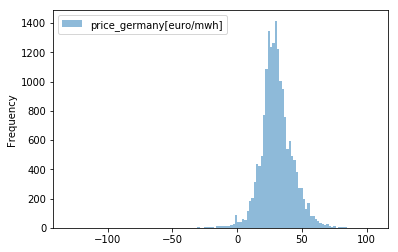

In [25]:
distr = master_data[target].plot(kind='hist', alpha=0.5, bins=130)

## Exploratory Visualization

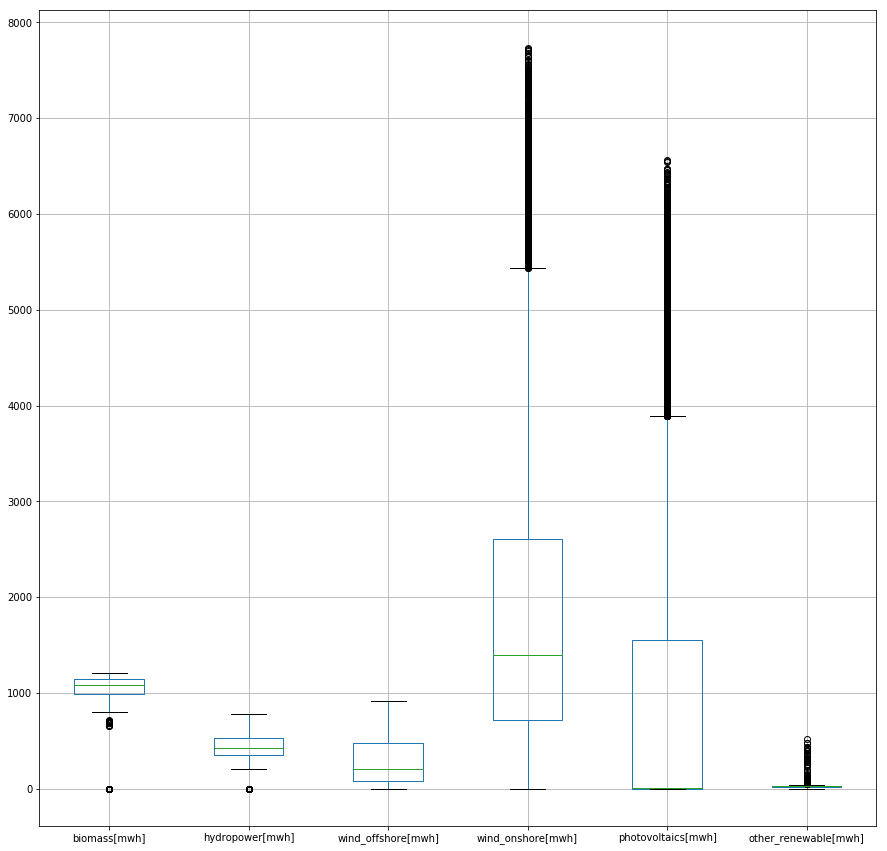

In [26]:
gen1_box = master_data[['biomass[mwh]','hydropower[mwh]','wind_offshore[mwh]','wind_onshore[mwh]','photovoltaics[mwh]',
                     'other_renewable[mwh]']].boxplot(return_type='axes',figsize=(15, 15))

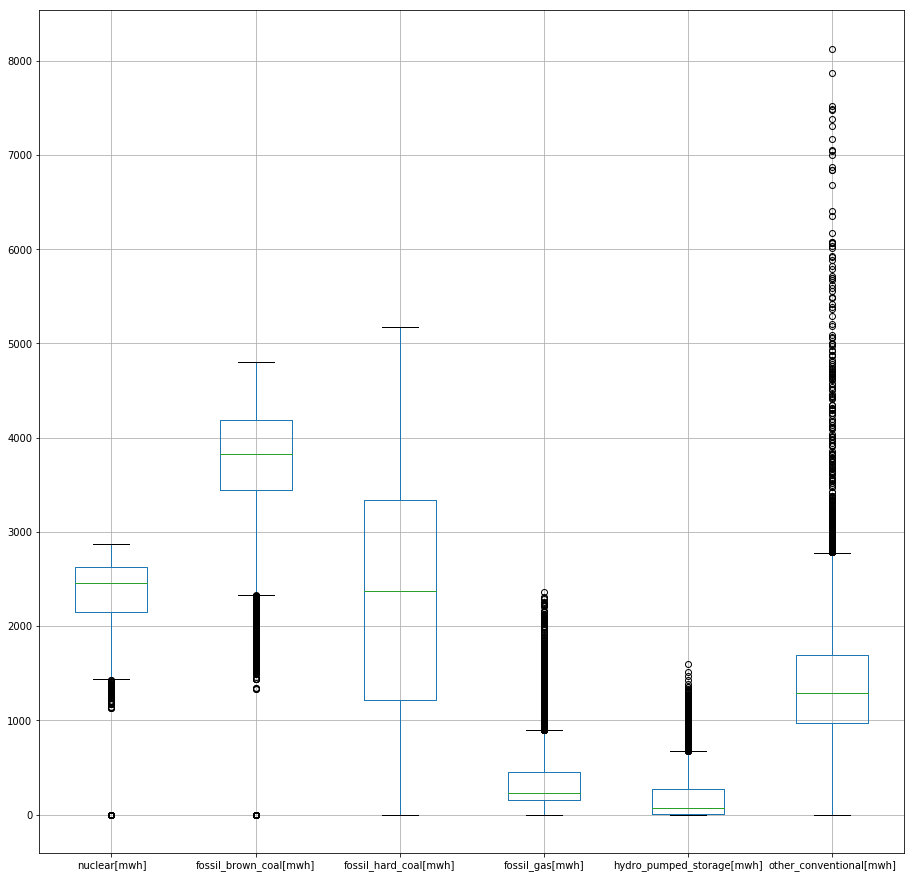

In [27]:
gen2_box = master_data[['nuclear[mwh]','fossil_brown_coal[mwh]','fossil_hard_coal[mwh]',
                     'fossil_gas[mwh]','hydro_pumped_storage[mwh]', 'other_conventional[mwh]']].boxplot(return_type='axes',figsize=(15.5, 15.5))

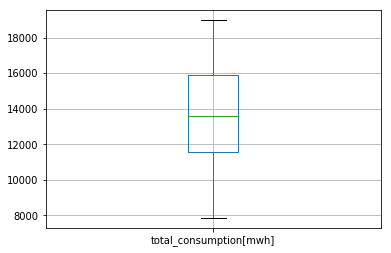

In [28]:
con_box = master_data[['total_consumption[mwh]']].boxplot(return_type='axes')


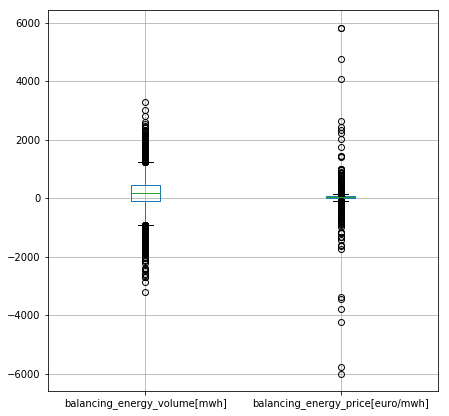

In [29]:
bal_box = master_data[['balancing_energy_volume[mwh]','balancing_energy_price[euro/mwh]']].boxplot(return_type='axes',figsize=(7,7))

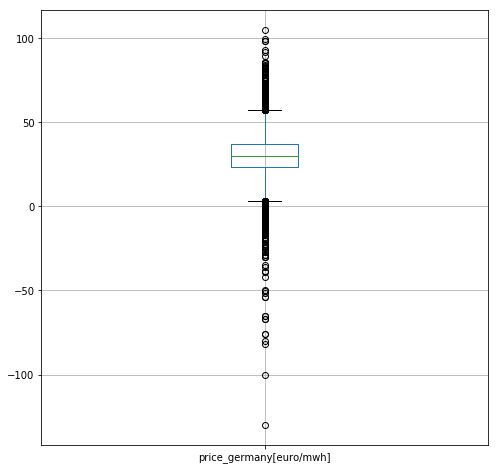

In [30]:
price_box = master_data[['price_germany[euro/mwh]']].boxplot(return_type='axes',figsize=(8,8))

In [31]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F0FA6A58>,
      dtype=object)

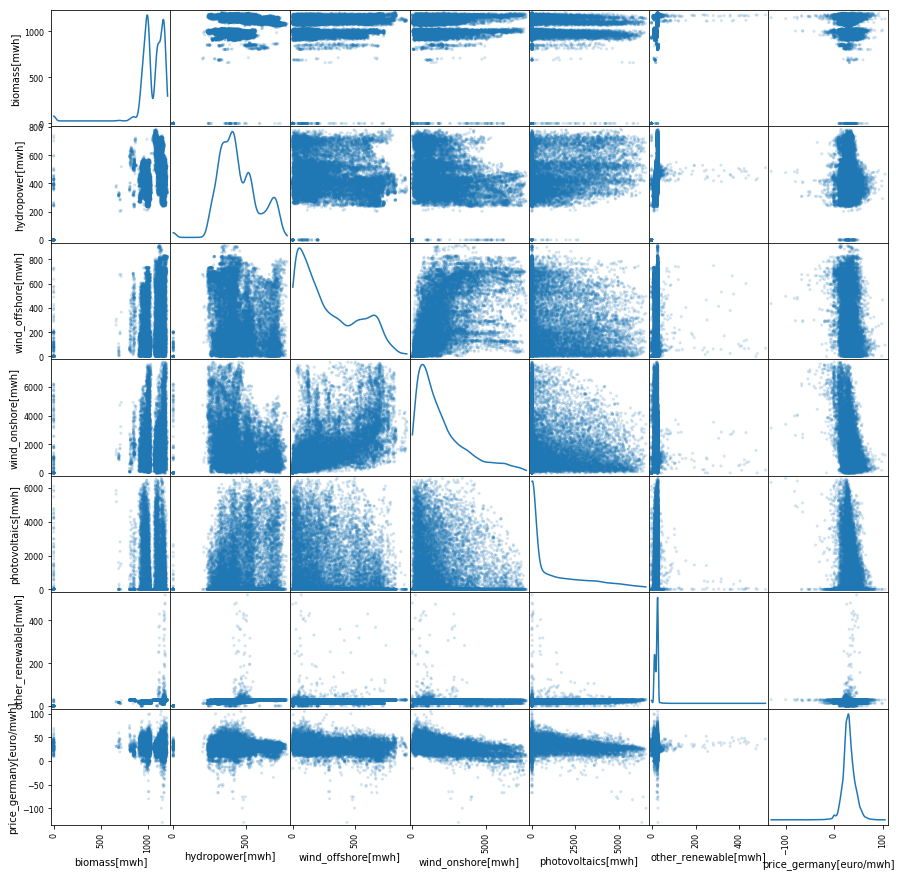

In [32]:
scatter_matrix(master_data[['biomass[mwh]','hydropower[mwh]','wind_offshore[mwh]','wind_onshore[mwh]','photovoltaics[mwh]',
                     'other_renewable[mwh]','price_germany[euro/mwh]']], alpha=0.2, figsize=(15,15), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F20B0828>,
      dtype=object)

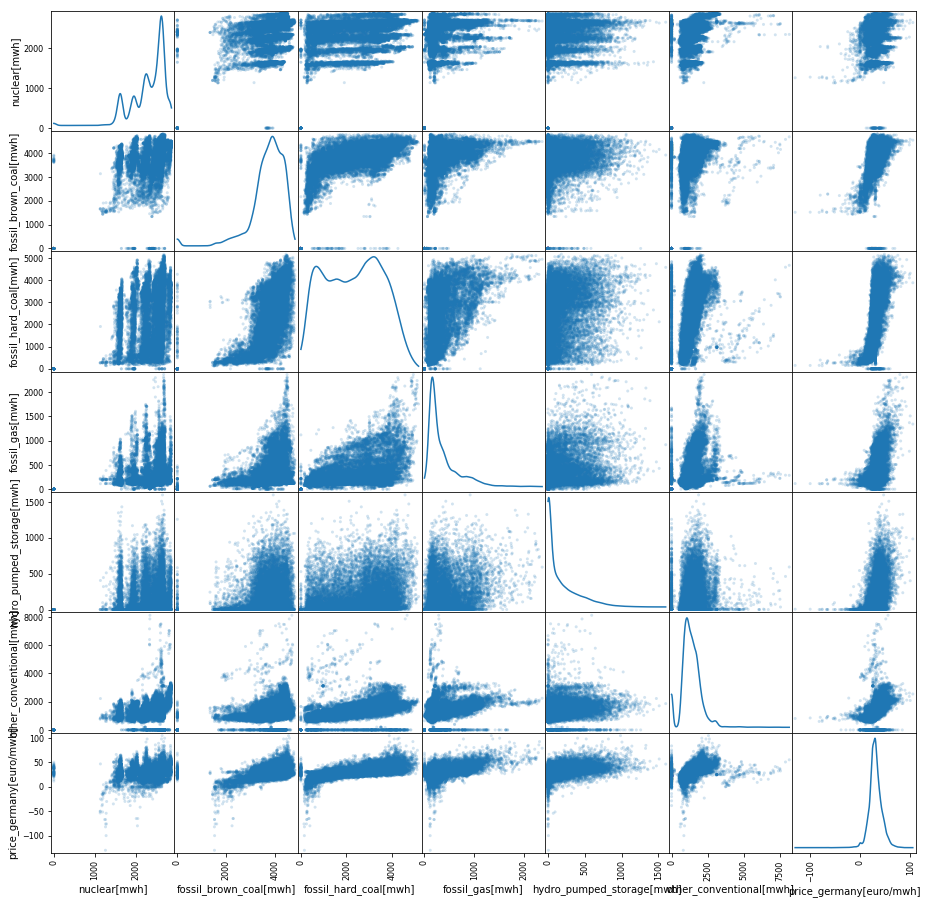

In [33]:
scatter_matrix(master_data[['nuclear[mwh]','fossil_brown_coal[mwh]','fossil_hard_coal[mwh]',
                     'fossil_gas[mwh]','hydro_pumped_storage[mwh]', 'other_conventional[mwh]','price_germany[euro/mwh]']], alpha=0.2, figsize=(15.5,15.5), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F4832D30>,
      dtype=object)

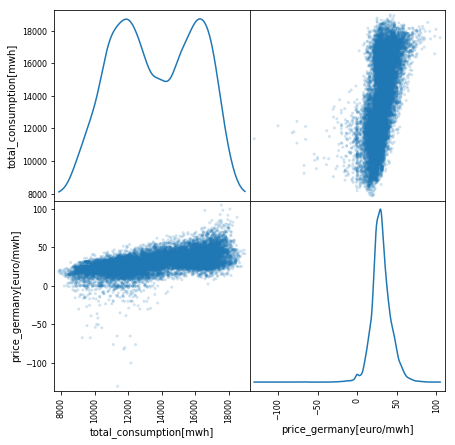

In [34]:
scatter_matrix(master_data[['total_consumption[mwh]','price_germany[euro/mwh]']], alpha=0.2, figsize=(7,7), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F43937B8>,
      dtype=object)

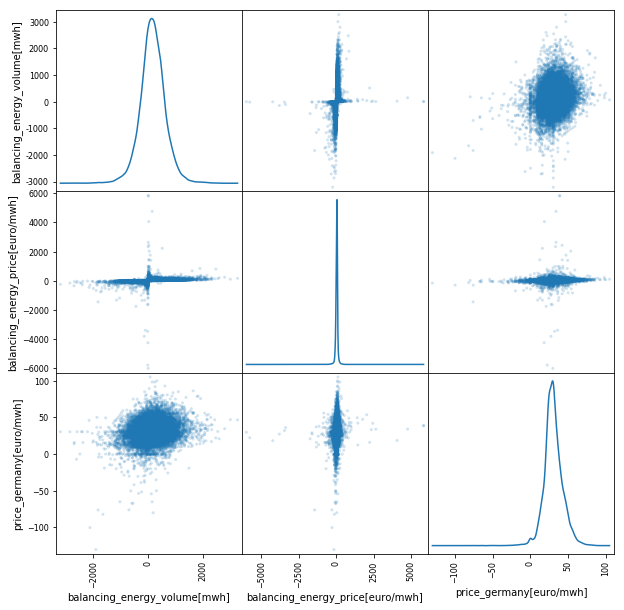

In [35]:
scatter_matrix(master_data[['balancing_energy_volume[mwh]','balancing_energy_price[euro/mwh]','price_germany[euro/mwh]']], alpha=0.2, figsize=(10,10), diagonal='kde')

### Data Transformation

From the above scatterplots there was no correlation among the features evident. The next step would be to transform the data and reobserve correlations.

In [36]:
master_data['balancing_energy_volume[mwh]'].min()

-3210.0

In [37]:
master_data['balancing_energy_price[euro/mwh]'].min()

-5997.42

In [38]:
transform_data = master_data.copy()

In [39]:
# As balancing_energy_volume contains negative values, Min + constant will be added to make the values positive
# transform_data['balancing_energy_volume[mwh]'] = master_data['balancing_energy_volume[mwh]'] + abs(master_data['balancing_energy_volume[mwh]'].min()) + 10
# transform_data['balancing_energy_price[euro/mwh]'] = master_data['balancing_energy_price[euro/mwh]'] + abs(master_data['balancing_energy_price[euro/mwh]'].min()) + 10

In [40]:
# remove time series data
transform_data.drop(columns=['date', 'time_of_day'], inplace=True)

In [45]:
# transform data using yeo-johnson transform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transform_data[['biomass[mwh]','hydropower[mwh]','wind_offshore[mwh]','wind_onshore[mwh]','photovoltaics[mwh]',
                     'other_renewable[mwh]','nuclear[mwh]','fossil_brown_coal[mwh]','fossil_hard_coal[mwh]',
                     'fossil_gas[mwh]','hydro_pumped_storage[mwh]', 'other_conventional[mwh]', 
                  'total_consumption[mwh]', 'balancing_energy_volume[mwh]','balancing_energy_price[euro/mwh]',
                  'price_germany[euro/mwh]']] = pt.fit_transform(transform_data[['biomass[mwh]','hydropower[mwh]','wind_offshore[mwh]','wind_onshore[mwh]','photovoltaics[mwh]',
                     'other_renewable[mwh]','nuclear[mwh]','fossil_brown_coal[mwh]','fossil_hard_coal[mwh]',
                     'fossil_gas[mwh]','hydro_pumped_storage[mwh]', 'other_conventional[mwh]', 
                  'total_consumption[mwh]', 'balancing_energy_volume[mwh]','balancing_energy_price[euro/mwh]',
                  'price_germany[euro/mwh]']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F6CDC6D8>,
      dtype=object)

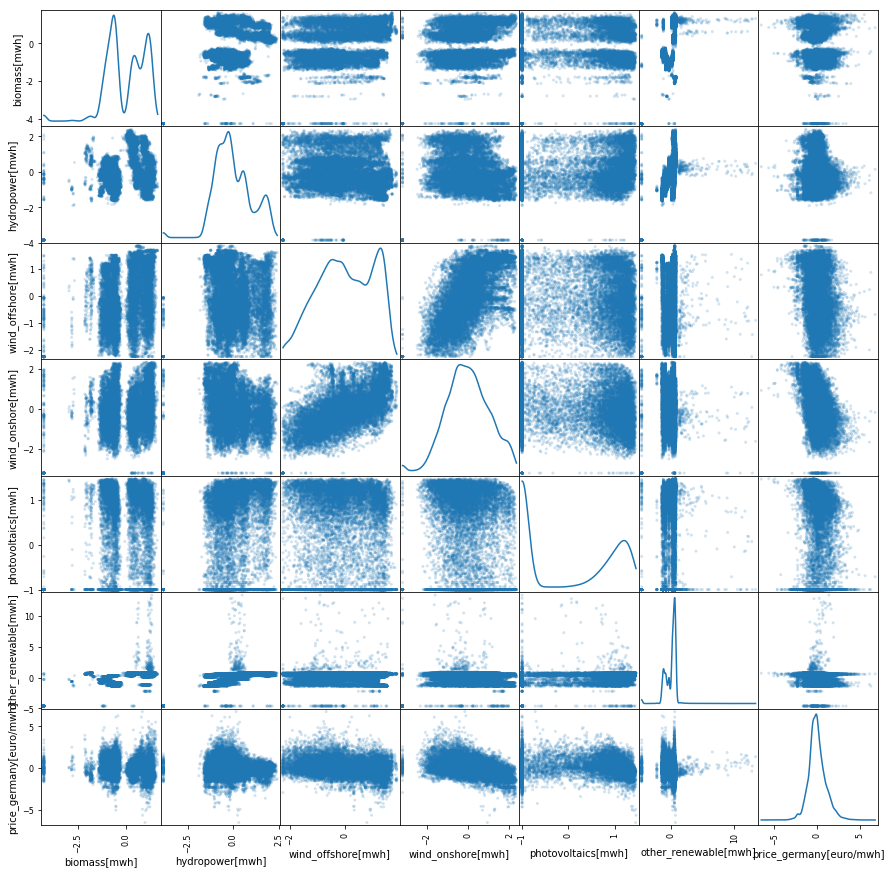

In [46]:
scatter_matrix(transform_data[['biomass[mwh]','hydropower[mwh]','wind_offshore[mwh]','wind_onshore[mwh]','photovoltaics[mwh]',
                     'other_renewable[mwh]','price_germany[euro/mwh]']], alpha=0.2, figsize=(15,15), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180FC81C080>,
      dtype=object)

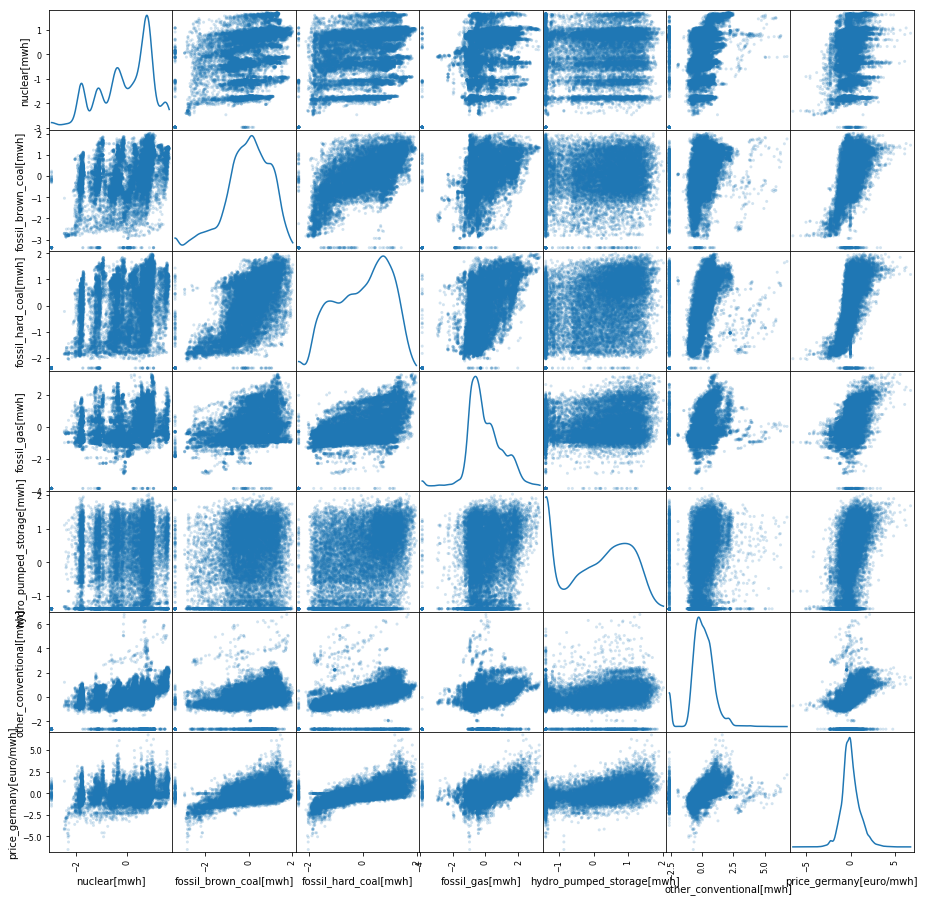

In [47]:
scatter_matrix(transform_data[['nuclear[mwh]','fossil_brown_coal[mwh]','fossil_hard_coal[mwh]',
                     'fossil_gas[mwh]','hydro_pumped_storage[mwh]', 'other_conventional[mwh]','price_germany[euro/mwh]']], alpha=0.2, figsize=(15.5,15.5), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180FF8FDC18>,
      dtype=object)

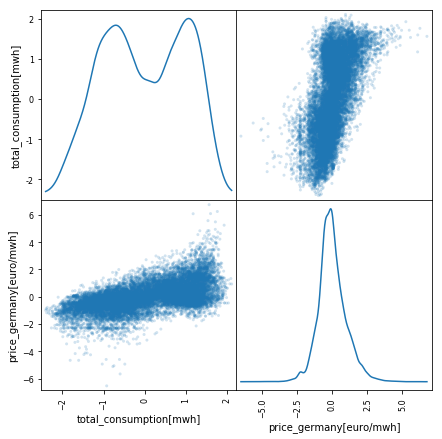

In [48]:
scatter_matrix(transform_data[['total_consumption[mwh]','price_germany[euro/mwh]']], alpha=0.2, figsize=(7,7), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180FF8E5C18>,
      dtype=object)

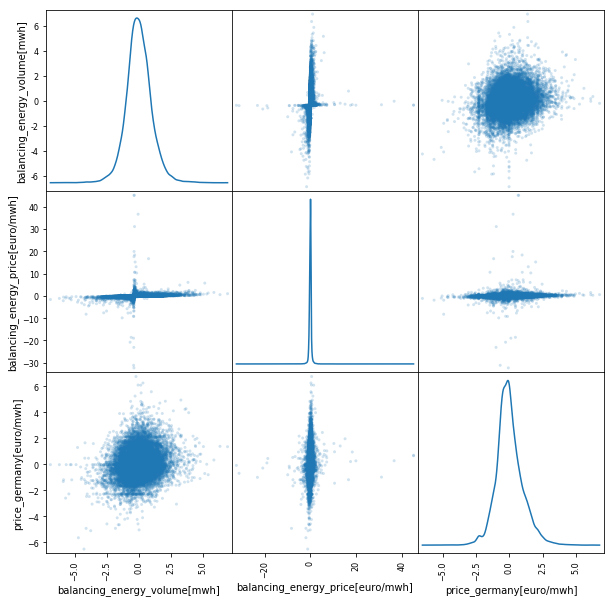

In [49]:
scatter_matrix(transform_data[['balancing_energy_volume[mwh]','balancing_energy_price[euro/mwh]','price_germany[euro/mwh]']], alpha=0.2, figsize=(10,10), diagonal='kde')